In [1]:
#import required libraries
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Dropout
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
#tensorflow use backend and keras use frontend


In [2]:
from keras.datasets import cifar10

In [3]:
(xtrain,ytrain),(xtest,ytest)=cifar10.load_data()


In [4]:
#check type of the train and test
type(xtrain)

numpy.ndarray

In [5]:
#check the shape of the train and test
xtrain.shape

(50000, 32, 32, 3)

In [6]:
#lool a first image in array
xtrain[100] #0 to 255

array([[[213, 229, 242],
        [211, 227, 240],
        [211, 227, 240],
        ...,
        [151, 174, 206],
        [151, 174, 206],
        [149, 172, 204]],

       [[214, 229, 241],
        [212, 227, 239],
        [212, 227, 239],
        ...,
        [152, 175, 207],
        [152, 175, 207],
        [151, 174, 205]],

       [[216, 229, 239],
        [214, 227, 237],
        [213, 227, 237],
        ...,
        [153, 176, 206],
        [153, 176, 206],
        [151, 174, 204]],

       ...,

       [[145, 159, 165],
        [136, 148, 154],
        [143, 152, 158],
        ...,
        [216, 217, 206],
        [196, 197, 191],
        [183, 183, 182]],

       [[139, 153, 159],
        [129, 142, 148],
        [129, 139, 145],
        ...,
        [227, 228, 219],
        [223, 224, 219],
        [209, 209, 209]],

       [[137, 152, 157],
        [143, 155, 161],
        [136, 145, 152],
        ...,
        [209, 209, 203],
        [217, 217, 213],
        [228, 228, 226]]

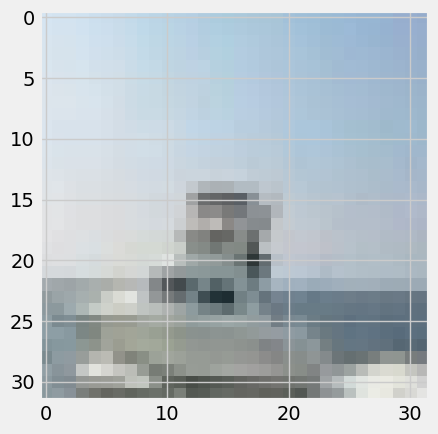

In [7]:
img0=plt.imshow(xtrain[100])

In [8]:
#get image label 
lab1=ytrain[100]
print(lab1)

[8]


In [9]:
classification=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']


In [10]:
print('image classification is',classification[ytrain[100][0]])

image classification is ship


In [11]:

ytrain_one_hot=to_categorical(ytrain)

ytest_one_hot=to_categorical(ytest)


In [12]:
ytrain_one_hot[100]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

In [13]:
print('one_hot_label',ytrain_one_hot[100])

one_hot_label [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [14]:
#normalize
xtrain=xtrain/255
ytrain=ytrain/255

In [15]:
xtrain[10]

array([[[0.20784314, 0.25490196, 0.20784314],
        [0.21176471, 0.24705882, 0.20392157],
        [0.21960784, 0.23529412, 0.19607843],
        ...,
        [0.18431373, 0.2       , 0.19607843],
        [0.16078431, 0.17647059, 0.17254902],
        [0.09411765, 0.10980392, 0.10588235]],

       [[0.18039216, 0.23137255, 0.16078431],
        [0.20784314, 0.24313725, 0.17647059],
        [0.21176471, 0.23137255, 0.17254902],
        ...,
        [0.16470588, 0.18039216, 0.17647059],
        [0.15294118, 0.16862745, 0.16470588],
        [0.10980392, 0.1254902 , 0.12156863]],

       [[0.17647059, 0.23137255, 0.14901961],
        [0.19607843, 0.23529412, 0.16078431],
        [0.18039216, 0.20392157, 0.13333333],
        ...,
        [0.14901961, 0.16470588, 0.16078431],
        [0.14117647, 0.15686275, 0.15294118],
        [0.11372549, 0.12941176, 0.1254902 ]],

       ...,

       [[0.27843137, 0.3254902 , 0.25882353],
        [0.29019608, 0.3254902 , 0.25882353],
        [0.31372549, 0

In [16]:
#create the architecture
model=Sequential()
#first conv layer
model.add(Conv2D(32,(5,5),activation='relu',input_shape=(32,32,3)))
#pooling layer
model.add(MaxPool2D(pool_size=(2,2)))
#second conv layer
model.add(Conv2D(32,(5,5),activation='relu'))
#pooling layer two
model.add(MaxPool2D(pool_size=(2,2)))

#flattening layer
model.add(Flatten())

#dense layer
model.add(Dense(1000,activation='relu'))

#add dropout layer
model.add(Dropout(0.5))

#add a layer
model.add(Dense(500,activation='relu'))

#add dropout layer
model.add(Dropout(0.5))

#add a layer
model.add(Dense(250,activation='relu'))

#add a layer
model.add(Dense(10,activation='softmax'))
  #multiple type of classification so using activation='softmax'
  #binary type of classification using activation='sigmoid'

C:\Users\surya\anaconda3\envs\DATAANALYTICS\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.summary()   #show the model architecture

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 10, 10, 32)          │          25,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 800)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1000)                │         801,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1000)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 500)                 │         500,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 250)                 │         125,250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           2,510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,457,324 (5.56 MB)

 Trainable params: 1,457,324 (5.56 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
# optimizer-change the neurons weight then predict the maximum output
#metrics- your alg are correctly work or not 

In [ ]:
tr=model.fit(xtrain,ytrain_one_hot,batch_size=256,epochs=70,validation_split=0.2)

In [20]:
model.evaluate(xtest,ytest_one_hot)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.5749 - loss: 289.4559


[290.7352600097656, 0.5766000151634216]

In [21]:
dog=plt.imread('C:\\Users\\surya\\Pictures\\download (3).jpg')

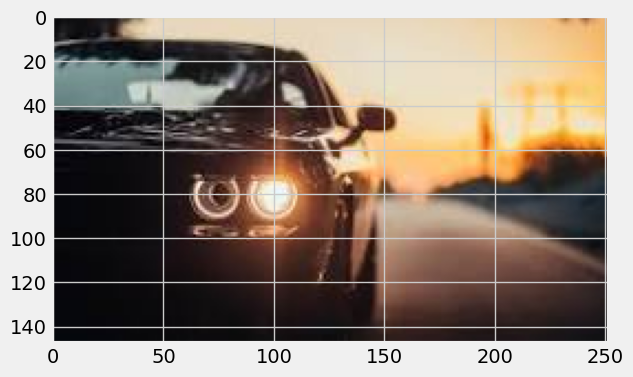

In [22]:
img=plt.imshow(dog)

In [ ]:

pip install scikit-image


In [ ]:
#resize the image  scikit-image
from skimage import transform


In [ ]:
resize=transform.resize(dog,(32,32,3))

In [ ]:
img=plt.imshow(resize)

In [ ]:
prediction=model.predict(np.array([resize]))
print(prediction)

In [ ]:
list_index=[0,1,2,3,4,5,6,7,8,9]
x=prediction
for i in range(10):
    for j in range(10):
        if x[0][list_index[i]]>x[0][list_index[j]]:
            temp=list_index[i]
            list_index[i]=list_index[j]
            list_index[j]=temp
print(list_index)

In [ ]:
for i in range(10):
    print(classification[list_index[i]])